<a href="https://colab.research.google.com/github/Sweetydutta8/hello-world2/blob/master/resnet50_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = '/content/drive/My Drive/New folder/train'
valid_path = '/content/drive/My Drive/New folder/test'


In [4]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob('/content/drive/My Drive/New folder/train/*')

In [8]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [11]:
# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

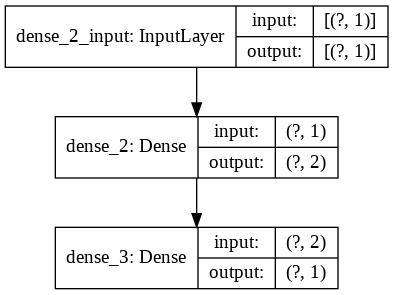

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/New folder/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/New folder/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [16]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1/1 [==============================] - 21s 21s/step - loss: 1.2106 - accuracy: 0.5000 - val_loss: 9.7745 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 9.7820 - accuracy: 0.5000 - val_loss: 7.8658 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 7.8599 - accuracy: 0.5000 - val_loss: 2.4050 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 2.4062 - accuracy: 0.5000 - val_loss: 4.5347 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 4.5447 - accuracy: 0.5000 - val_loss: 7.0561 - val_accuracy: 0.5000


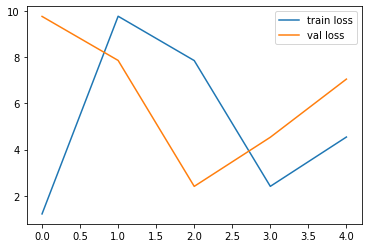

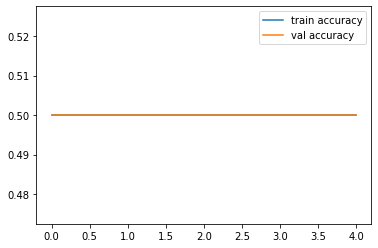

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [21]:
import tensorflow as tf

from keras.models import load_model

model.save('resnet_new_model.h5')

In [22]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('resnet_new_model.h5')
img = image.load_img('/content/drive/My Drive/New folder/dummy/IM-0010-0001.jpeg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
print (classes)

[[9.9955624e-01 4.4372931e-04]]
